# Leadangle_fitplot.ipynb

`Leadangle_fit.py`で計算した結果をプロットする。

In [29]:
from scipy import stats
import numpy as np
import math
import copy
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
from matplotlib.ticker import AutoMinorLocator
from matplotlib.colors import LinearSegmentedColormap  # colormapをカスタマイズする
import matplotlib.colors as colors
import matplotlib.patches as patches
import matplotlib.patheffects as pe
import B_JRM33 as BJRM
import B_equator as BEQ
import Leadangle_wave as LeadA
from TScmap import TScmap

# Color universal design
cud4 = ['#FF3300', '#FFF100', '#03AF7A', '#005AFF', '#4DC4FF', '#FF8082', '#F6AA00', '#990099', '#804000']
cud4bs = ['#FFCABF', '#FFFF80', '#D8F255', '#BFE4FF', '#FFCA80', '#77D9A8', '#C9ACE6', '#84919E']

# matplotlib フォント設定
fontname = 'Nimbus Sans'
plt.rcParams.update({'font.sans-serif': fontname,
                     'font.family': 'sans-serif',
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': fontname,
                     'mathtext.it': fontname+':italic',
                     # 'mathtext.bf': 'Nimbus Sans:italic:bold',
                     'mathtext.bf': fontname+':bold'
                     })
params = {
    # 'lines.markersize': 1,
    # 'lines.linewidth': 1,
    'axes.linewidth': 2,
    'xtick.major.size': 5,
    'xtick.minor.size': 3.5,
    'xtick.major.width': 2.0,
    'xtick.minor.width': 1.25,
    'ytick.major.size': 5,
    'ytick.minor.size': 3,
    'ytick.major.width': 2.0,
    'ytick.minor.width': 1.25,
}
plt.rcParams.update(params)

def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append((v / vmax, c))
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

whiteblue=generate_cmap(['#000000','#010E5E','#042AA6','#0F7CE0','#1AC7FF','#FFFFFF'])

RJ = 71492E+3        # 木星半径[m]   
AMU = 1.66E-27       # [kg]
Ai = 18              # 平均イオン原子量 (Bagenal+2015)
Hp0 = 0.64*RJ        # 基準スケールハイト [m] (Bagenal&Delamere2011)


In [30]:
# Set legend shadow
def legend_shadow(fig, ax, legend, dx, dy):

  frame = legend.get_window_extent()

  xmin, ymin = fig.transFigure.inverted().transform((frame.xmin, frame.ymin))
  xmax, ymax = fig.transFigure.inverted().transform((frame.xmax, frame.ymax))

  # plot patch shadow
  rect = patches.Rectangle((xmin+dx, ymin+dy), xmax-xmin, ymax-ymin, 
                          transform=fig.transFigure,
                          edgecolor='k', facecolor='k',
                          clip_on=False)
  ax.add_patch(rect)

  return None

[]

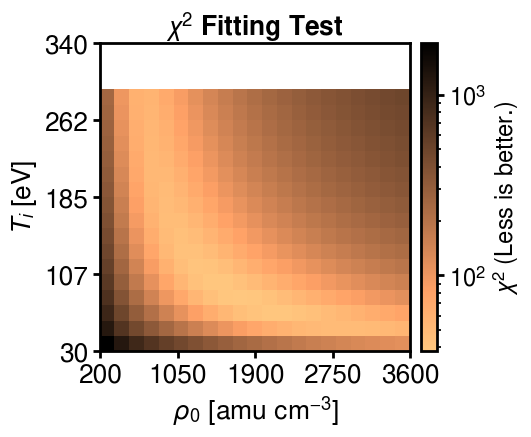

In [31]:
chi2 = np.loadtxt('img/LeadangleFit/test2/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/test2/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/test2/params_Ti0.txt')

# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

[]

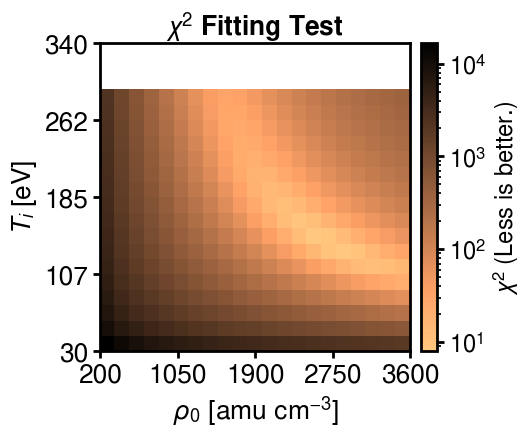

In [32]:
chi2 = np.loadtxt('img/LeadangleFit/test4/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/test4/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/test4/params_Ti0.txt')

# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

In [33]:
from scipy import stats
print(stats.chi2.pdf(30, 2))

1.5295116025091287e-07


In [34]:
from scipy import stats
print(stats.chi2.pdf(9.458, 3))

0.01084004576524119


In [35]:
from scipy import stats
print(stats.chi2.pdf(3.84, 1))

0.029846887483060566


[]

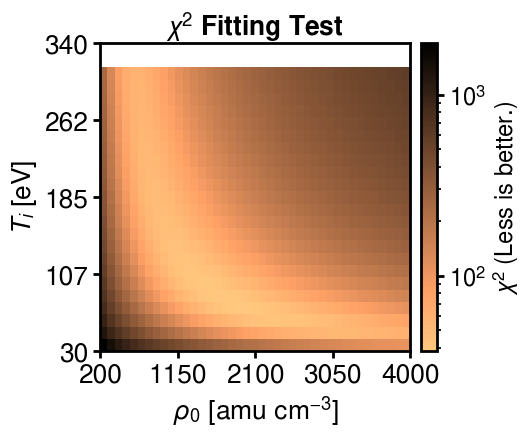

In [36]:
chi2 = np.loadtxt('img/LeadangleFit/2014_1/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2014_1/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2014_1/params_Ti0.txt')

# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

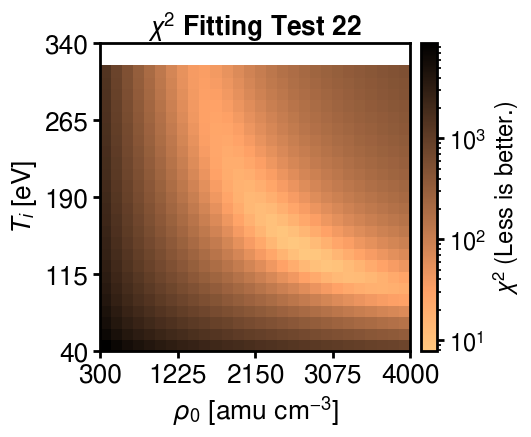

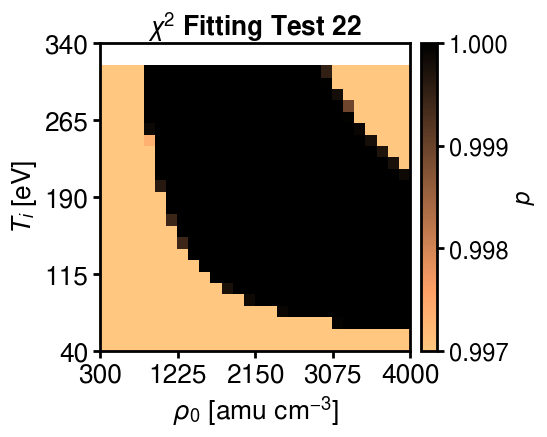

In [37]:
chi2 = np.loadtxt('img/LeadangleFit/2022_1/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2022_1/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2022_1/params_Ti0.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=365)

# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 22', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))
sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()



# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 22', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))
sm = ax.pcolor(p_value, cmap='copper_r', vmin=0.997, vmax=1)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$p$', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

[]

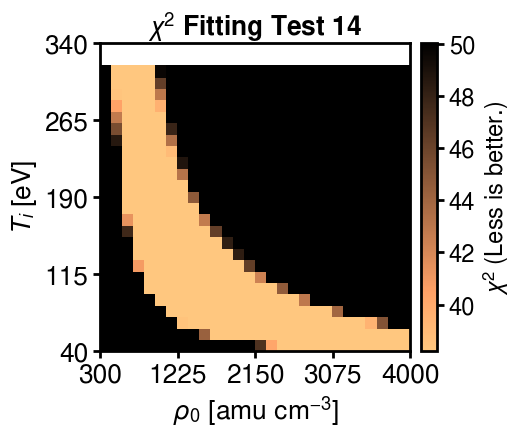

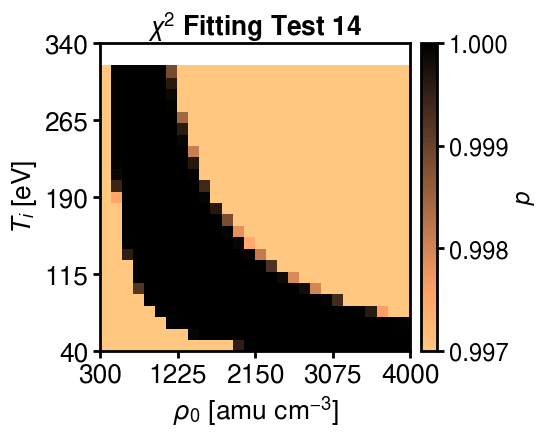

In [38]:
chi2 = np.loadtxt('img/LeadangleFit/2014_2/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2014_2/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2014_2/params_Ti0.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=156)


# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 14', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))
sm = ax.pcolor(chi2-chi2min, cmap='copper_r', vmin=chi2min, vmax=chi2min+11.8)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()


# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 14', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))
sm = ax.pcolor(p_value, cmap='copper_r', vmin=0.997, vmax=1)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$p$', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()


In [39]:
stats.chi2.sf(x=200, df=156)

0.010007995407871808

[]

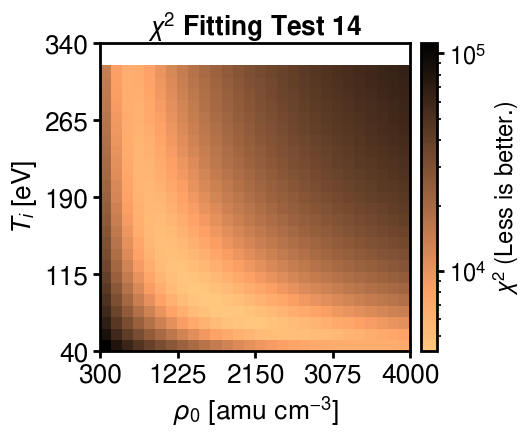

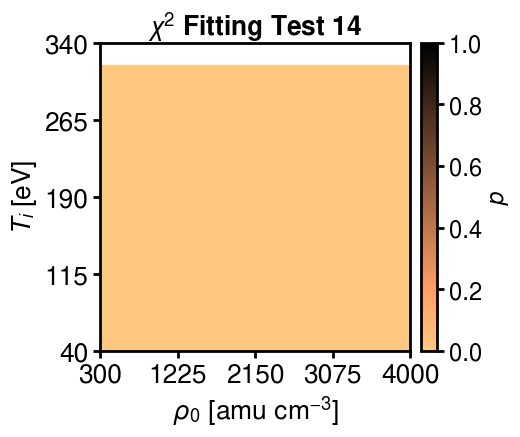

In [40]:
chi2 = np.loadtxt('img/LeadangleFit/2014_3/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2014_3/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2014_3/params_Ti0.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=156)


# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 14', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))
sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()


# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 14', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))
sm = ax.pcolor(p_value, cmap='copper_r', vmin=0, vmax=1)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$p$', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

[]

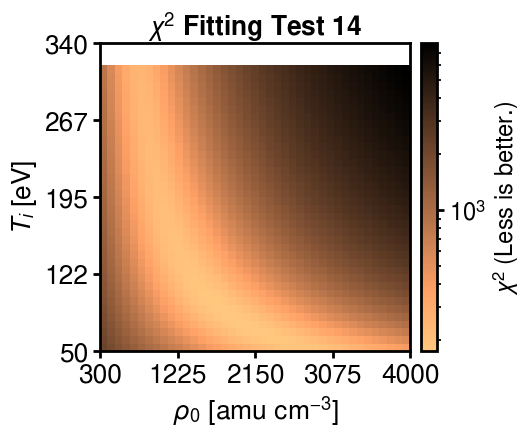

In [41]:
chi2 = np.loadtxt('img/LeadangleFit/test5/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/test5/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/test5/params_Ti0.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=156)


# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 14', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

[]

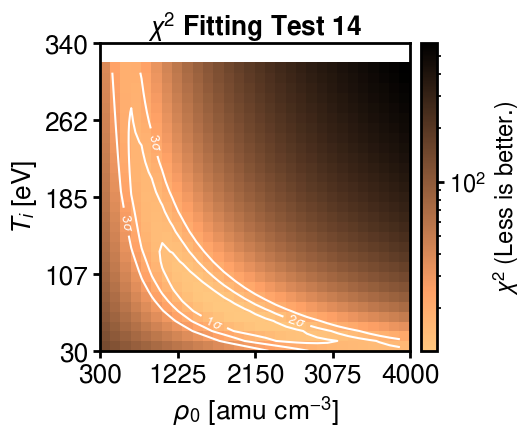

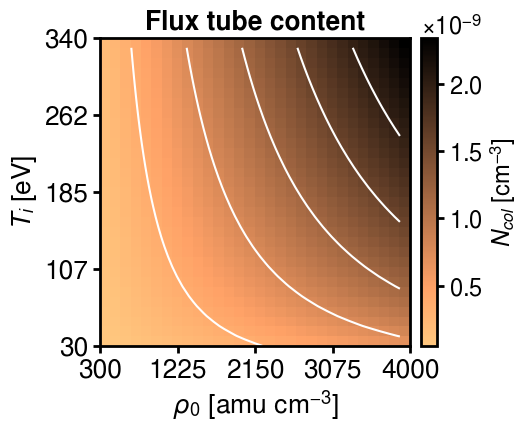

In [42]:
chi2 = np.loadtxt('img/LeadangleFit/test6/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/test6/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/test6/params_Ti0.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=156)


# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 14', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max))
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

cn = ax.contour(chi2, levels=[chi2min+2.30, chi2min+6.17, chi2min+11.8], colors='#ffffff')
cn.levels = [r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']
ax.clabel(cn, cn.levels, inline=True, fontsize=fontsize*0.5)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()



# Plot
Hp = Hp0*np.sqrt(Ti0/Ai)
alpha = 1/(Hp**2)
Ncol = RHO0*(1E+6)*AMU*np.sqrt(np.pi/alpha)

fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('Flux tube content', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(Ncol, cmap='copper_r')
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

cn = ax.contour(Ncol, levels=6, colors='#ffffff')

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label(r'$N_{col}$ [cm$^{-3}$]', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ
pp.ax.yaxis.set_major_formatter(
        ptick.ScalarFormatter(useMathText=True))    # 指数表記
pp.ax.yaxis.set_offset_position('left')

plt.plot()

[]

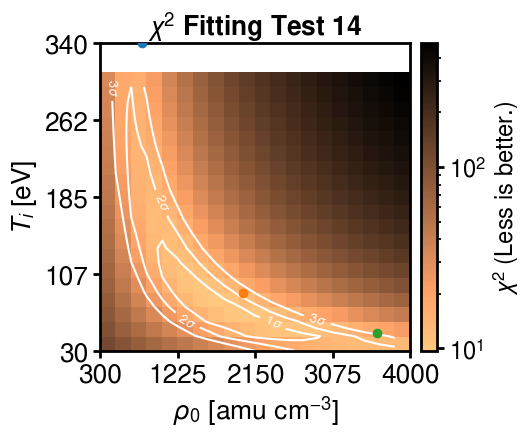

In [43]:
chi2 = np.loadtxt('img/LeadangleFit/test7/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/test7/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/test7/params_Ti0.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=156)

# array sizes
xsize = RHO0.shape[1]
ysize = Ti0.shape[0]
xpx = xsize/(np.max(RHO0)-np.min(RHO0))
ypx = ysize/(np.max(Ti0)-np.min(Ti0))

# values of Bagenal+2015
rho_LH = 800    # [amu cm-3]
Ti_LH = 340     # [eV]
rho_LH = (rho_LH-np.min(RHO0))*xpx
Ti_LH = (Ti_LH-np.min(Ti0))*ypx
rho_M = 2000    # [amu cm-3]
Ti_M = 88       # [eV]
rho_M = (rho_M-np.min(RHO0))*xpx
Ti_M = (Ti_M-np.min(Ti0))*ypx
rho_HC = 3600   # [amu cm-3]
Ti_HC = 48      # [eV]
rho_HC = (rho_HC-np.min(RHO0))*xpx
Ti_HC = (Ti_HC-np.min(Ti0))*ypx


# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 14', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
ax.scatter(rho_LH, Ti_LH, zorder=3)
ax.scatter(rho_M, Ti_M, zorder=3)
ax.scatter(rho_HC, Ti_HC, zorder=3)

sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max), zorder=1)
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

cn = ax.contour(chi2, levels=[chi2min+2.30, chi2min+6.17, chi2min+11.8], colors='#ffffff', zorder=2)
cn.levels = [r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']
ax.clabel(cn, cn.levels, inline=True, fontsize=fontsize*0.5)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

[]

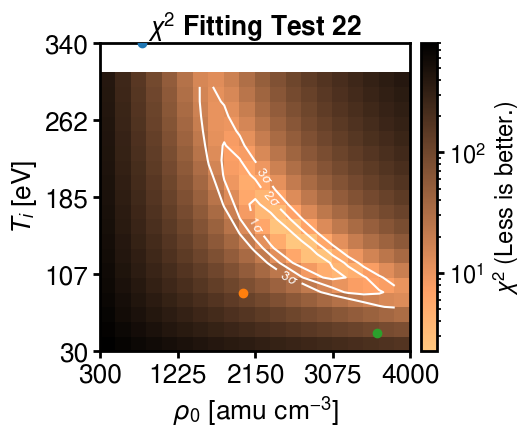

In [44]:
chi2 = np.loadtxt('img/LeadangleFit/test8/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/test8/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/test8/params_Ti0.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=156)

# array sizes
xsize = RHO0.shape[1]
ysize = Ti0.shape[0]
xpx = xsize/(np.max(RHO0)-np.min(RHO0))
ypx = ysize/(np.max(Ti0)-np.min(Ti0))

# values of Bagenal+2015
rho_LH = 800    # [amu cm-3]
Ti_LH = 340     # [eV]
rho_LH = (rho_LH-np.min(RHO0))*xpx
Ti_LH = (Ti_LH-np.min(Ti0))*ypx
rho_M = 2000    # [amu cm-3]
Ti_M = 88       # [eV]
rho_M = (rho_M-np.min(RHO0))*xpx
Ti_M = (Ti_M-np.min(Ti0))*ypx
rho_HC = 3600   # [amu cm-3]
Ti_HC = 48      # [eV]
rho_HC = (rho_HC-np.min(RHO0))*xpx
Ti_HC = (Ti_HC-np.min(Ti0))*ypx


# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting Test 22', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
ax.scatter(rho_LH, Ti_LH, zorder=3)
ax.scatter(rho_M, Ti_M, zorder=3)
ax.scatter(rho_HC, Ti_HC, zorder=3)

sm = ax.pcolor(chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max), zorder=1)
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

cn = ax.contour(chi2, levels=[chi2min+2.30, chi2min+6.17, chi2min+11.8], colors='#ffffff', zorder=2)
cn.levels = [r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']
ax.clabel(cn, cn.levels, inline=True, fontsize=fontsize*0.5)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

[]

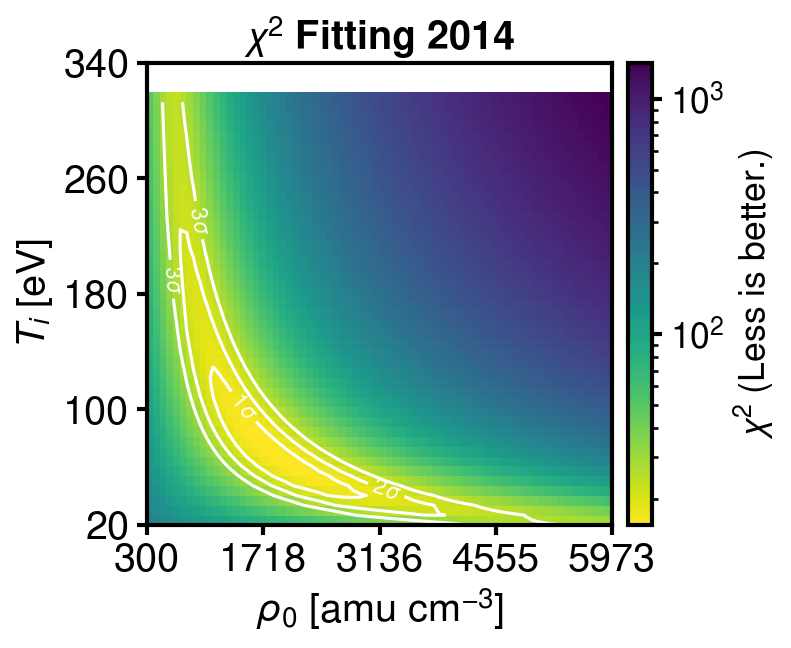

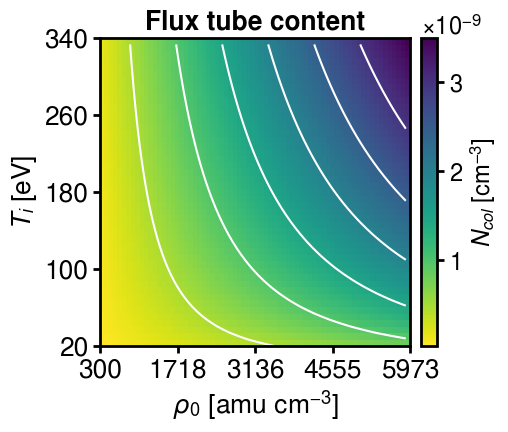

In [45]:
chi2 = np.loadtxt('img/LeadangleFit/2014_6/params_chi2A.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2014_6/params_RHO0A.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2014_6/params_Ti0A.txt')
chi2A = np.loadtxt('img/LeadangleFit/2014_6B/params_chi2.txt')
RHO0A = np.loadtxt('img/LeadangleFit/2014_6B/params_RHO0.txt')
Ti0A = np.loadtxt('img/LeadangleFit/2014_6B/params_Ti0.txt')

new_chi2 = np.zeros((Ti0.shape[0],RHO0.shape[1]+RHO0A.shape[1]))
new_chi2[:,0:RHO0.shape[1]] = chi2
new_chi2[:,RHO0.shape[1]:] = chi2A

new_RHO0 = np.zeros((Ti0.shape[0],RHO0.shape[1]+RHO0A.shape[1]))
new_RHO0[:,0:RHO0.shape[1]] = RHO0
new_RHO0[:,RHO0.shape[1]:] = RHO0A

new_Ti0 = np.zeros((Ti0.shape[0],RHO0.shape[1]+RHO0A.shape[1]))
new_Ti0[:,0:RHO0.shape[1]] = Ti0
new_Ti0[:,RHO0.shape[1]:] = Ti0A

# np.savetxt('img/LeadangleFit/2014_6/params_chi2A2.txt', new_chi2)
# np.savetxt('img/LeadangleFit/2014_6/params_RHO0A2.txt', new_RHO0)
# np.savetxt('img/LeadangleFit/2014_6/params_Ti0A2.txt', new_Ti0)

chi2 = new_chi2
RHO0 = new_RHO0
Ti0 = new_Ti0

# array sizes
xsize = RHO0.shape[1]
ysize = Ti0.shape[0]
xpx = xsize/(np.max(RHO0)-np.min(RHO0))
ypx = ysize/(np.max(Ti0)-np.min(Ti0))

# values of Bagenal+2015
rho_LH = 800    # [amu cm-3]
Ti_LH = 340     # [eV]
rho_LH = (rho_LH-np.min(RHO0))*xpx
Ti_LH = (Ti_LH-np.min(Ti0))*ypx
rho_M = 2000    # [amu cm-3]
Ti_M = 88       # [eV]
rho_M = (rho_M-np.min(RHO0))*xpx
Ti_M = (Ti_M-np.min(Ti0))*ypx
rho_HC = 3600   # [amu cm-3]
Ti_HC = 48      # [eV]
rho_HC = (rho_HC-np.min(RHO0))*xpx
Ti_HC = (Ti_HC-np.min(Ti0))*ypx


# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=150)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting 2014', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# ax.scatter(rho_LH, Ti_LH, zorder=3)
# ax.scatter(rho_M, Ti_M, zorder=3)
# ax.scatter(rho_HC, Ti_HC, zorder=3)

sm = ax.pcolor(chi2, cmap='viridis_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max), zorder=1)
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

cn = ax.contour(chi2, levels=[chi2min+2.30, chi2min+6.17, chi2min+11.8], colors='#ffffff', zorder=2)
cn.levels = [r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']
ax.clabel(cn, cn.levels, inline=True, fontsize=fontsize*0.55)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

# Plot
Hp = Hp0*np.sqrt(Ti0/Ai)
alpha = 1/(Hp**2)
Ncol = RHO0*(1E+6)*AMU*np.sqrt(np.pi/alpha)

fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('Flux tube content', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(Ncol, cmap='viridis_r')
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

cn = ax.contour(Ncol, levels=6, colors='#ffffff')

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label(r'$N_{col}$ [cm$^{-3}$]', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ
pp.ax.yaxis.set_major_formatter(
        ptick.ScalarFormatter(useMathText=True))    # 指数表記
pp.ax.yaxis.set_offset_position('left')

plt.plot()

[]

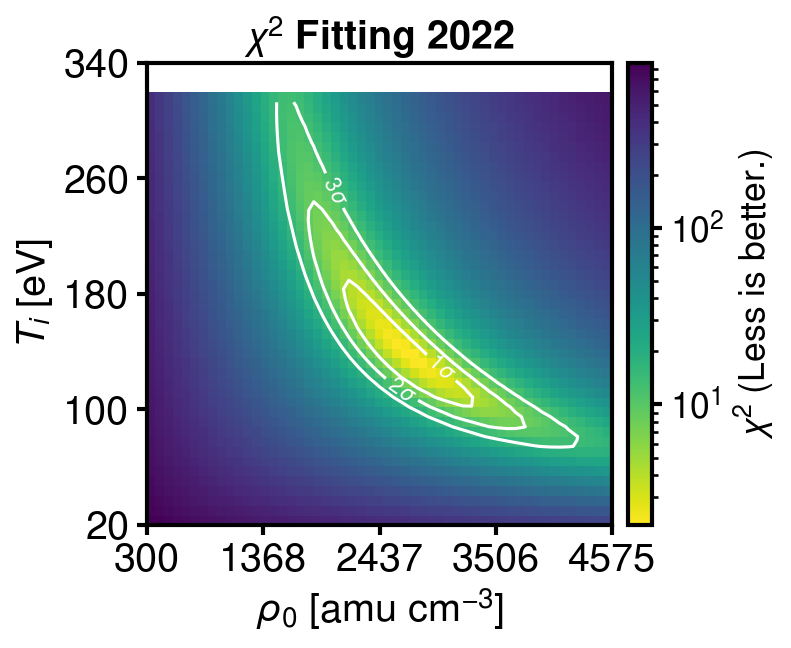

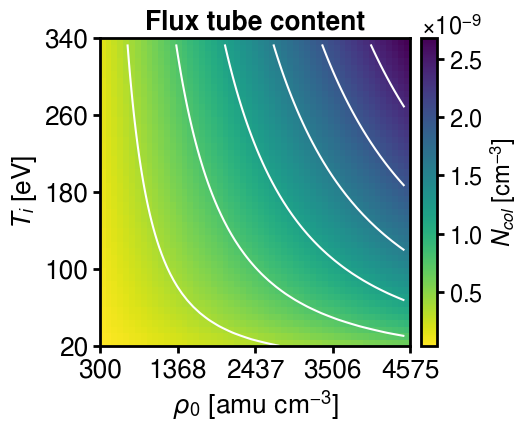

In [46]:
chi2 = np.loadtxt('img/LeadangleFit/2022_6/params_chi2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2022_6/params_RHO0.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2022_6/params_Ti0.txt')
chi2A = np.loadtxt('img/LeadangleFit/2022_6A/params_chi2.txt')
RHO0A = np.loadtxt('img/LeadangleFit/2022_6A/params_RHO0.txt')
Ti0A = np.loadtxt('img/LeadangleFit/2022_6A/params_Ti0.txt')

new_chi2 = np.zeros((Ti0.shape[0],RHO0.shape[1]+RHO0A.shape[1]))
new_chi2[:,0:RHO0.shape[1]] = chi2
new_chi2[:,RHO0.shape[1]:] = chi2A

new_RHO0 = np.zeros((Ti0.shape[0],RHO0.shape[1]+RHO0A.shape[1]))
new_RHO0[:,0:RHO0.shape[1]] = RHO0
new_RHO0[:,RHO0.shape[1]:] = RHO0A

new_Ti0 = np.zeros((Ti0.shape[0],RHO0.shape[1]+RHO0A.shape[1]))
new_Ti0[:,0:RHO0.shape[1]] = Ti0
new_Ti0[:,RHO0.shape[1]:] = Ti0A

# np.savetxt('img/LeadangleFit/2022_6/params_chi2A2.txt', new_chi2)
# np.savetxt('img/LeadangleFit/2022_6/params_RHO0A2.txt', new_RHO0)
# np.savetxt('img/LeadangleFit/2022_6/params_Ti0A2.txt', new_Ti0)

chi2 = new_chi2
RHO0 = new_RHO0
Ti0 = new_Ti0

# array sizes
xsize = RHO0.shape[1]
ysize = Ti0.shape[0]
xpx = xsize/(np.max(RHO0)-np.min(RHO0))
ypx = ysize/(np.max(Ti0)-np.min(Ti0))

# values of Bagenal+2015
rho_LH = 800    # [amu cm-3]
Ti_LH = 340     # [eV]
rho_LH = (rho_LH-np.min(RHO0))*xpx
Ti_LH = (Ti_LH-np.min(Ti0))*ypx
rho_M = 2000    # [amu cm-3]
Ti_M = 88       # [eV]
rho_M = (rho_M-np.min(RHO0))*xpx
Ti_M = (Ti_M-np.min(Ti0))*ypx
rho_HC = 3600   # [amu cm-3]
Ti_HC = 48      # [eV]
rho_HC = (rho_HC-np.min(RHO0))*xpx
Ti_HC = (Ti_HC-np.min(Ti0))*ypx


# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=150)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting 2022', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# ax.scatter(rho_LH, Ti_LH, zorder=3)
# ax.scatter(rho_M, Ti_M, zorder=3)
# ax.scatter(rho_HC, Ti_HC, zorder=3)

sm = ax.pcolor(chi2, cmap='viridis_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max), zorder=1)
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

cn = ax.contour(chi2, levels=[chi2min+2.30, chi2min+6.17, chi2min+11.8], colors='#ffffff', zorder=2)
cn.levels = [r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']
ax.clabel(cn, cn.levels, inline=True, fontsize=fontsize*0.55)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

# Plot
Hp = Hp0*np.sqrt(Ti0/Ai)
alpha = 1/(Hp**2)
Ncol = RHO0*(1E+6)*AMU*np.sqrt(np.pi/alpha)

fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('Flux tube content', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],5))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
sm = ax.pcolor(Ncol, cmap='viridis_r')
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

cn = ax.contour(Ncol, levels=6, colors='#ffffff')

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label(r'$N_{col}$ [cm$^{-3}$]', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ
pp.ax.yaxis.set_major_formatter(
        ptick.ScalarFormatter(useMathText=True))    # 指数表記
pp.ax.yaxis.set_offset_position('left')

plt.plot()

(array([7]), array([19])) rho_min [1862.22222222] Ti_min [68.69565217]
(array([17]), array([29])) rho_min [2684.44444444] Ti_min [138.26086957]


[]

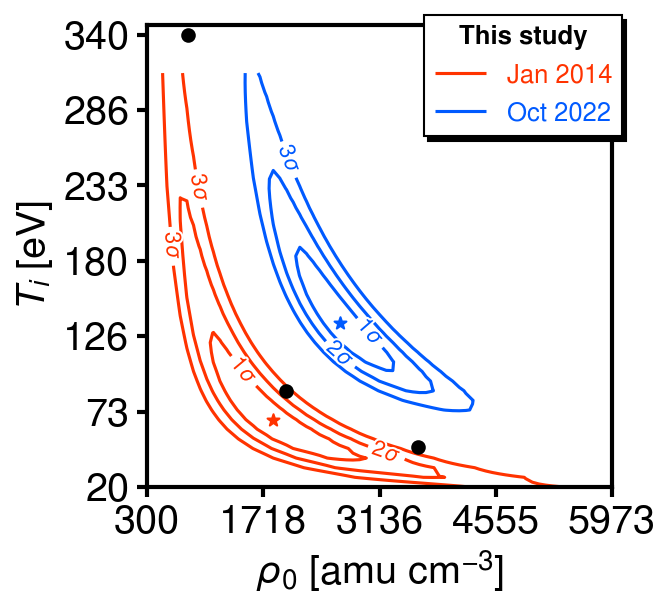

In [47]:
chi2 = np.loadtxt('img/LeadangleFit/2014_6/params_chi2A2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2014_6/params_RHO0A2.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2014_6/params_Ti0A2.txt')

# array sizes
xsize = RHO0.shape[1]
ysize = Ti0.shape[0]
xpx = xsize/(np.max(RHO0)-np.min(RHO0))
ypx = ysize/(np.max(Ti0)-np.min(Ti0))

# values of Bagenal+2015
rho_LH = 800    # [amu cm-3]
Ti_LH = 340     # [eV]
rho_LH = (rho_LH-np.min(RHO0))*xpx
Ti_LH = (Ti_LH-np.min(Ti0))*ypx
rho_M = 2000    # [amu cm-3]
Ti_M = 88       # [eV]
rho_M = (rho_M-np.min(RHO0))*xpx
Ti_M = (Ti_M-np.min(Ti0))*ypx
rho_HC = 3600   # [amu cm-3]
Ti_HC = 48      # [eV]
rho_HC = (rho_HC-np.min(RHO0))*xpx
Ti_HC = (Ti_HC-np.min(Ti0))*ypx


# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=150)
ax.tick_params(axis='both', labelsize=fontsize)
# ax.set_title('$\\chi^2$ Fitting 14 & 22', weight='bold', fontsize=fontsize)
ax.set_xlabel('$\\rho_{\,0}$ [amu cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xlim(0,chi2.shape[1])
ax.set_ylim(0,chi2.shape[0]+1)
ax.set_xticks(np.linspace(0,chi2.shape[1],5))
ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
ax.set_yticks(np.linspace(0,chi2.shape[0],7))
ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),7,dtype=int))
ax.scatter(rho_LH, Ti_LH, color='k', zorder=3)
ax.scatter(rho_M, Ti_M, color='k', zorder=3)
ax.scatter(rho_HC, Ti_HC, color='k', zorder=3)

yr = ['14', '22']
redblue = [cud4[0], cud4[3]]
cn_list = []
for i in range(2):
    chi2 = np.loadtxt('img/LeadangleFit/20'+yr[i]+'_6/params_chi2A2.txt')
    RHO0 = np.loadtxt('img/LeadangleFit/20'+yr[i]+'_6/params_RHO0A2.txt')
    Ti0 = np.loadtxt('img/LeadangleFit/20'+yr[i]+'_6/params_Ti0A2.txt')
    # chi square 0 is not true value.
    chi2min = np.min(chi2[np.where(chi2>0)])
    chi2min_pos = np.where(chi2==chi2min)
    chi2max = np.max(chi2[np.where(chi2>0)])
    chi2ave = np.average(chi2[np.where(chi2>0)])
    chi2[np.where(chi2==0)] = np.nan
    print(chi2min_pos, 'rho_min', RHO0[chi2min_pos], 'Ti_min', Ti0[chi2min_pos])

    ax.scatter(chi2min_pos[1], chi2min_pos[0], marker='*', color=redblue[i], zorder=3)
    cn = ax.contour(chi2, levels=[chi2min+2.30, chi2min+6.17, chi2min+11.8], colors=redblue[i], zorder=2)
    cn.levels = [r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']
    cl = ax.clabel(cn, cn.levels, inline=True, fontsize=fontsize*0.55)
    # Line stroke around clabels
    plt.setp(cl, path_effects=[pe.withStroke(linewidth=2., foreground='white')])
    # Line stroke around contour
    plt.setp(cn.collections, path_effects=[pe.withStroke(linewidth=3, foreground="w")])
    cn_list.append(cn)

# second legend
h1,_ = cn_list[0].legend_elements()
h2,_ = cn_list[1].legend_elements()
legend1 = ax.legend([h1[0],h2[0]],['Jan 2014','Oct 2022'],
                    loc='upper right',
                    bbox_to_anchor=(1.05, 1.05),
                    fancybox=False,
                    facecolor='white',
                    framealpha=1,
                    edgecolor='k',
                    fontsize=fontsize*0.65,)
legend1.set_title('This study', prop={'size': fontsize*0.65, 'weight': 'bold'})
legend_shadow(fig, ax, legend1, dx=0.006, dy=-0.008)

# get contour colors
i = 0
for leg2text in legend1.get_texts():
    leg2text.set_color(redblue[i])
    i += 1

plt.plot()

### Bagenal+2015 Galileo結果に重ねる

In [48]:
# Constants
Zi = 1.4    # mean charge of ions (Bagenal+2015) [q]
Ai = 18     # (Bagenal+2015) [amu]


[]

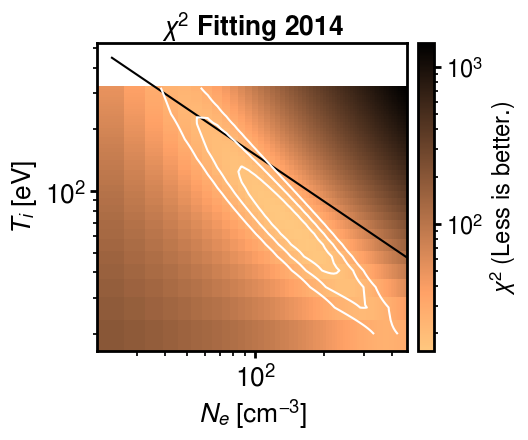

In [49]:
chi2 = np.loadtxt('img/LeadangleFit/2014_6/params_chi2A2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2014_6/params_RHO0A2.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2014_6/params_Ti0A2.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=156)

# array sizes
xsize = RHO0.shape[1]
ysize = Ti0.shape[0]
xpx = xsize/(np.max(RHO0)-np.min(RHO0))
ypx = ysize/(np.max(Ti0)-np.min(Ti0))

# values of Bagenal+2015
rho_LH = 800    # [amu cm-3]
Ti_LH = 340     # [eV]
rho_LH = (rho_LH-np.min(RHO0))*xpx
Ti_LH = (Ti_LH-np.min(Ti0))*ypx
rho_M = 2000    # [amu cm-3]
Ti_M = 88       # [eV]
rho_M = (rho_M-np.min(RHO0))*xpx
Ti_M = (Ti_M-np.min(Ti0))*ypx
rho_HC = 3600   # [amu cm-3]
Ti_HC = 48      # [eV]
rho_HC = (rho_HC-np.min(RHO0))*xpx
Ti_HC = (Ti_HC-np.min(Ti0))*ypx

# Galieo fit - Bagenal+2015
Ne_fit = np.linspace(np.min((RHO0/Ai)*Zi), np.max((RHO0/Ai)*Zi), 20)
Ti_fit = 370*(30/Ne_fit)**0.75

# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting 2014', weight='bold', fontsize=fontsize)
ax.set_xlabel('$N_e$ [cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xticks(np.linspace(0,chi2.shape[1],5))
# ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
# ax.set_yticks(np.linspace(0,chi2.shape[0],5))
# ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# ax.scatter(rho_LH, Ti_LH, zorder=3)
# ax.scatter(rho_M, Ti_M, zorder=3)
# ax.scatter(rho_HC, Ti_HC, zorder=3)

ax.plot(Ne_fit, Ti_fit, color='k', zorder=1.5)

sm = ax.pcolor((RHO0/Ai)*Zi, Ti0, chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max), zorder=1)
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

cn = ax.contour((RHO0/Ai)*Zi, Ti0, chi2, levels=[chi2min+2.30, chi2min+6.17, chi2min+11.8], colors='#ffffff', zorder=2)
# cn.levels = [r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']
# ax.clabel(cn, cn.levels, inline=True, fontsize=fontsize*0.55)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

[]

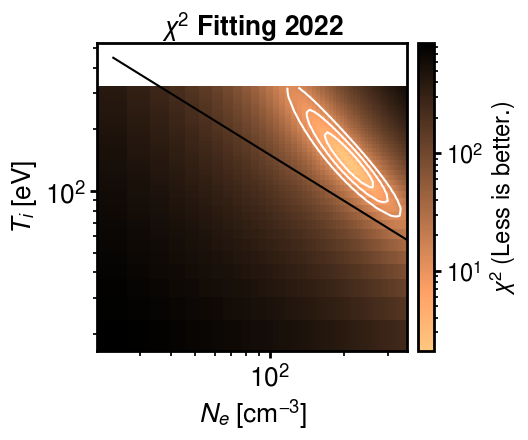

In [50]:
chi2 = np.loadtxt('img/LeadangleFit/2022_6/params_chi2A2.txt')
RHO0 = np.loadtxt('img/LeadangleFit/2022_6/params_RHO0A2.txt')
Ti0 = np.loadtxt('img/LeadangleFit/2022_6/params_Ti0A2.txt')

# chi square value converted to p value
p_value = np.zeros(chi2.shape)
for i in range(p_value.shape[0]):
    for j in range(p_value.shape[1]):
        p_value[i,j] = stats.chi2.sf(x=chi2[i,j], df=156)

# array sizes
xsize = RHO0.shape[1]
ysize = Ti0.shape[0]
xpx = xsize/(np.max(RHO0)-np.min(RHO0))
ypx = ysize/(np.max(Ti0)-np.min(Ti0))

# values of Bagenal+2015
rho_LH = 800    # [amu cm-3]
Ti_LH = 340     # [eV]
rho_LH = (rho_LH-np.min(RHO0))*xpx
Ti_LH = (Ti_LH-np.min(Ti0))*ypx
rho_M = 2000    # [amu cm-3]
Ti_M = 88       # [eV]
rho_M = (rho_M-np.min(RHO0))*xpx
Ti_M = (Ti_M-np.min(Ti0))*ypx
rho_HC = 3600   # [amu cm-3]
Ti_HC = 48      # [eV]
rho_HC = (rho_HC-np.min(RHO0))*xpx
Ti_HC = (Ti_HC-np.min(Ti0))*ypx

# Galieo fit - Bagenal+2015
Ne_fit = np.linspace(np.min((RHO0/Ai)*Zi), np.max((RHO0/Ai)*Zi), 20)
Ti_fit = 370*(30/Ne_fit)**0.75

# chi square 0 is not true value.
chi2min = np.min(chi2[np.where(chi2>0)])
chi2max = np.max(chi2)
chi2ave = np.average(chi2)
p_value[np.where(chi2==0)] = np.nan
chi2[np.where(chi2==0)] = np.nan

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_title('$\\chi^2$ Fitting 2022', weight='bold', fontsize=fontsize)
ax.set_xlabel('$N_e$ [cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xticks(np.linspace(0,chi2.shape[1],5))
# ax.set_xticklabels(np.linspace(np.min(RHO0),np.max(RHO0),5,dtype=int))
# ax.set_yticks(np.linspace(0,chi2.shape[0],5))
# ax.set_yticklabels(np.linspace(np.min(Ti0),np.max(Ti0),5,dtype=int))
# ax.scatter(rho_LH, Ti_LH, zorder=3)
# ax.scatter(rho_M, Ti_M, zorder=3)
# ax.scatter(rho_HC, Ti_HC, zorder=3)

ax.plot(Ne_fit, Ti_fit, color='k', zorder=1.5)

sm = ax.pcolor((RHO0/Ai)*Zi, Ti0, chi2, cmap='copper_r', norm=colors.LogNorm(vmin=chi2min, vmax=chi2max), zorder=1)
# sm = ax.pcolor(chi2, cmap='copper_r', vmin=chi2min, vmax=chi2min+19)

cn = ax.contour((RHO0/Ai)*Zi, Ti0, chi2, levels=[chi2min+2.30, chi2min+6.17, chi2min+11.8], colors='#ffffff', zorder=2)
# cn.levels = [r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']
# ax.clabel(cn, cn.levels, inline=True, fontsize=fontsize*0.55)

axpos = ax.get_position()
cax = fig.add_axes([axpos.x1*1.03, axpos.y0, 0.04, axpos.y1-axpos.y0])
pp = fig.colorbar(sm, cax=cax)
pp.set_label('$\\chi^2$ (Less is better.)', fontsize=fontsize*0.9)
pp.ax.tick_params(labelsize=fontsize*0.9)
pp.ax.yaxis.get_offset_text().set_fontsize(fontsize*0.9)  # 指数部のフォントサイズ

plt.plot()

(array([20]), array([34])) rho_min [1686.03798202] Ti_min [74.40607696]
(array([29]), array([44])) rho_min [2801.43733674] Ti_min [134.3905379]


[]

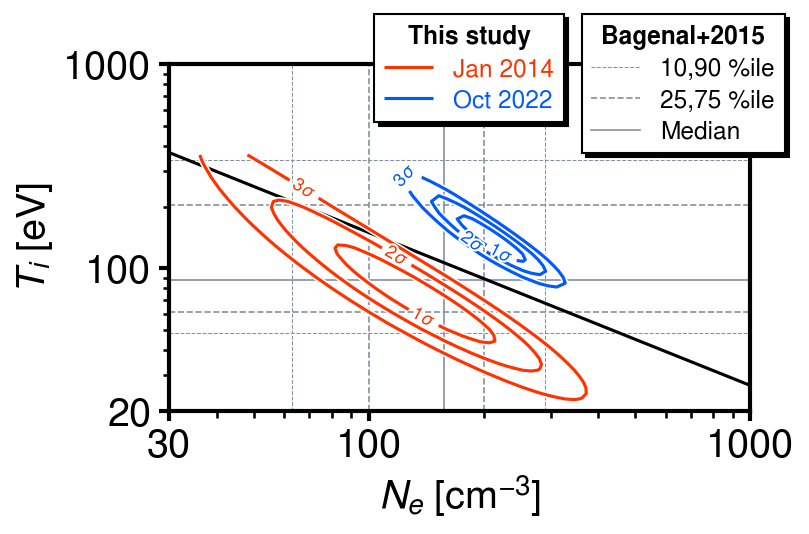

In [52]:
# Galieo fit - Bagenal+2015
Ne_fit = np.linspace(30, 1000, 20)
Ti_fit = 370*((30/Ne_fit)**0.75)

# Plot
fontsize = 19
fig, ax = plt.subplots(figsize=(5,3), dpi=150)
ax.tick_params(axis='both', which='both', labelsize=fontsize)
# ax.set_title('$\\chi^2$ Fitting 14 & 22', weight='bold', fontsize=fontsize)
ax.set_xlabel('$N_e$ [cm$^{-3}$]', fontsize=fontsize)
ax.set_ylabel('$T_i$ [eV]', fontsize=fontsize)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(30,1000)
ax.set_ylim(20,1000)
ax.set_xticks(np.array([30,100,1000], dtype=int))
ax.set_xticklabels(np.array([30,100,1000], dtype=int))
ax.set_yticks(np.array([20,100,1000], dtype=int))
ax.set_yticklabels(np.array([20,100,1000], dtype=int))

yr = ['14', '22']
redblue = [cud4[0], cud4[3]]
cn_list = []
for i in range(2):
    chi2 = np.loadtxt('img/LeadangleFit/20'+yr[i]+'_7/params_chi2.txt')
    RHO0 = np.loadtxt('img/LeadangleFit/20'+yr[i]+'_7/params_RHO0.txt')
    Ti0 = np.loadtxt('img/LeadangleFit/20'+yr[i]+'_7/params_Ti0.txt')

    # chi2 = np.loadtxt('img/LeadangleFit/2014_7/params_chi2.txt')
    # RHO0 = np.loadtxt('img/LeadangleFit/2014_7/params_RHO0.txt')
    # Ti0 = np.loadtxt('img/LeadangleFit/2014_7/params_Ti0.txt')
    # print('T min max', np.min(Ti0), np.max(Ti0))
    # print('Rho min max', np.min(RHO0), np.max(RHO0))

    # chi square 0 is not true value.
    chi2min = np.min(chi2[np.where(chi2>0)])
    chi2min_pos = np.where(chi2==chi2min)
    chi2max = np.max(chi2[np.where(chi2>0)])
    chi2ave = np.average(chi2[np.where(chi2>0)])
    chi2[np.where(chi2==0)] = np.nan
    print(chi2min_pos, 'rho_min', RHO0[chi2min_pos], 'Ti_min', Ti0[chi2min_pos])

    # ax.scatter(chi2min_pos[1], chi2min_pos[0], marker='*', color=redblue[i], zorder=3)
    cn = ax.contour((RHO0/Ai)*Zi, Ti0, chi2,
                    levels=[chi2min+2.30, chi2min+6.17, chi2min+11.8],
                    colors=redblue[i],
                    linewidths=1.5,
                    zorder=2)
    cn.levels = [r'$1\sigma$', r'$2\sigma$', r'$3\sigma$']
    cl = ax.clabel(cn, cn.levels, inline=True, fontsize=fontsize*0.45)
    # Line stroke around clabels
    plt.setp(cl, path_effects=[pe.withStroke(linewidth=2., foreground='white')])
    # Line stroke around contour
    plt.setp(cn.collections, path_effects=[pe.withStroke(linewidth=3, foreground="w")])
    cn_list.append(cn)


ax.plot(Ne_fit, Ti_fit, color='k', zorder=1.5)
ax.axhline(y=340, color=cud4bs[7], linewidth=0.5, label='10,90 %ile', linestyle='dashed', zorder=0.9)  # H/C
ax.axvline(x=63, color=cud4bs[7], linewidth=0.5, linestyle='dashed', zorder=0.9)   # H/C
ax.axhline(y=205, color=cud4bs[7], linewidth=0.8, label='25,75 %ile', linestyle='dashed', zorder=0.9)    # 75
ax.axvline(x=100, color=cud4bs[7], linewidth=0.8, linestyle='dashed', zorder=0.9)    # 25
ax.axhline(y=88, color=cud4bs[7], linewidth=0.8, label='Median', zorder=0.9)  # Medium
ax.axvline(x=158, color=cud4bs[7], linewidth=0.8, zorder=0.9)                        # Medium
ax.axhline(y=61, color=cud4bs[7], linewidth=0.8, linestyle='dashed', zorder=0.9)     # 25
ax.axvline(x=200, color=cud4bs[7], linewidth=0.8, linestyle='dashed', zorder=0.9)    # 75
ax.axhline(y=48, color=cud4bs[7], linewidth=0.5, linestyle='dashed', zorder=0.9)   # L/H
ax.axvline(x=290, color=cud4bs[7], linewidth=0.5, linestyle='dashed', zorder=0.9)  # L/H

# first legend
legend1 = ax.legend(loc='upper right',
                    bbox_to_anchor=(1.08, 1.18),
                    fancybox=False,
                    facecolor='white',
                    framealpha=1,
                    edgecolor='k',
                    fontsize=fontsize*0.62,
                    labelspacing=0.34,)
legend1.set_title('Bagenal+2015', prop={'size': fontsize*0.62, 'weight': 'bold'})
legend_shadow(fig, ax, legend1, dx=0.006, dy=-0.009)

# second legend
h1,_ = cn_list[0].legend_elements()
h2,_ = cn_list[1].legend_elements()
legend2 = ax.legend([h1[0],h2[0]],['Jan 2014','Oct 2022'],
                    loc='upper right',
                    bbox_to_anchor=(0.7, 1.18),
                    fancybox=False,
                    facecolor='white',
                    framealpha=1,
                    edgecolor='k',
                    fontsize=fontsize*0.62,
                    labelspacing=0.34,)
legend2.set_title('This study', prop={'size': fontsize*0.62, 'weight': 'bold'})
legend_shadow(fig, ax, legend2, dx=0.006, dy=-0.009)

# get contour colors
i = 0
for leg2text in legend2.get_texts():
    leg2text.set_color(redblue[i])
    i += 1

ax.add_artist(legend1)

plt.plot()

In [ ]:
print(370*(30/158)**0.75)

106.42651714180613


In [ ]:
RHO0 = np.loadtxt('img/LeadangleFit/2014_6/params_RHO0.txt')
print(RHO0[0,:])
print(RHO0[0,1]-RHO0[0,0])

[ 300.          382.22222222  464.44444444  546.66666667  628.88888889
  711.11111111  793.33333333  875.55555556  957.77777778 1040.
 1122.22222222 1204.44444444 1286.66666667 1368.88888889 1451.11111111
 1533.33333333 1615.55555556 1697.77777778 1780.         1862.22222222
 1944.44444444 2026.66666667 2108.88888889 2191.11111111 2273.33333333
 2355.55555556 2437.77777778 2520.         2602.22222222 2684.44444444
 2766.66666667 2848.88888889 2931.11111111 3013.33333333 3095.55555556
 3177.77777778 3260.         3342.22222222 3424.44444444 3506.66666667
 3588.88888889 3671.11111111 3753.33333333 3835.55555556 3917.77777778
 4000.        ]
82.22222222222223
